# A simulated example: UMAP and time series data

### Load required packages and configuration of figure size

In [1]:
import numpy as np
import statsmodels.tsa.arima_process as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import math
%matplotlib inline
import random
plt.rcParams['figure.figsize'] = (10.0, 10.0)
random.seed(0)

### Function to simulate ARIMA time series

In [2]:
def ARIMA(phi = np.array([0]), theta = np.array([0]), d = 0, t = 0, mu = 0, sigma = 1, n = 20, burn = 10):
    """ Simulate data from ARMA model (eq. 1.2.4):

    z_t = phi_1*z_{t-1} + ... + phi_p*z_{t-p} + a_t + theta_1*a_{t-1} + ... + theta_q*a_{t-q}

    with d unit roots for ARIMA model.

    Arguments:
    phi -- array of shape (p,) or (p, 1) containing phi_1, phi2, ... for AR model
    theta -- array of shape (q) or (q, 1) containing theta_1, theta_2, ... for MA model
    d -- number of unit roots for non-stationary time series
    t -- value deterministic linear trend
    mu -- mean value for normal distribution error term
    sigma -- standard deviation for normal distribution error term
    n -- length time series
    burn -- number of discarded values because series beginns without lagged terms

    Return:
    x -- simulated ARMA process of shape (n, 1)

    Reference:
    Time Series Analysis by Box et al.
    """

    # add "theta_0" = 1 to theta
    theta = np.append(1, theta)
    
    # set max lag length AR model
    p = phi.shape[0]

    # set max lag length MA model
    q = theta.shape[0]

    # simulate n + q error terms
    a = np.random.normal(mu, sigma, (n + max(p, q) + burn, 1))
    
    # create array for returned values
    x = np.zeros((n + max(p, q) + burn, 1))

    # initialize first time series value
    x[0] = a[0]

    for i in range(1, x.shape[0]):
        AR = np.dot(phi[0 : min(i, p)], np.flip(x[i - min(i, p) : i], 0))
        MA = np.dot(theta[0 : min(i + 1, q)], np.flip(a[i - min(i, q - 1) : i + 1], 0))
        x[i] = AR + MA + t

    # add unit roots
    if d != 0:
        ARMA = x[-n: ]
        m = ARMA.shape[0]
        z = np.zeros((m + 1, 1)) # create temp array

        for i in range(d):
            for j in range(m):
                z[j + 1] = ARMA[j] + z[j] 
            ARMA = z[1: ]
        x[-n: ] = z[1: ]
        
    return x[-n: ]

### Configure window for sliding window approach

In [3]:
#Window width (Number of columns)
w = 30
#Stride
s = 1
#Start time
t_0 = 0
#Desired rows
r = 700
#Length of matrix
len = w * r

### Generate AR(1) process

In [4]:
phi = np.array([0.9]) # AR part using 1 lag
theta = np.array([0]) # MA part using 1 lag
n = 1000 # number of simulated values
# to get comparable results
 
ar1 = np.array(ARIMA(phi = phi, theta = theta, sigma = 0.01, n = n)) # simulate time series

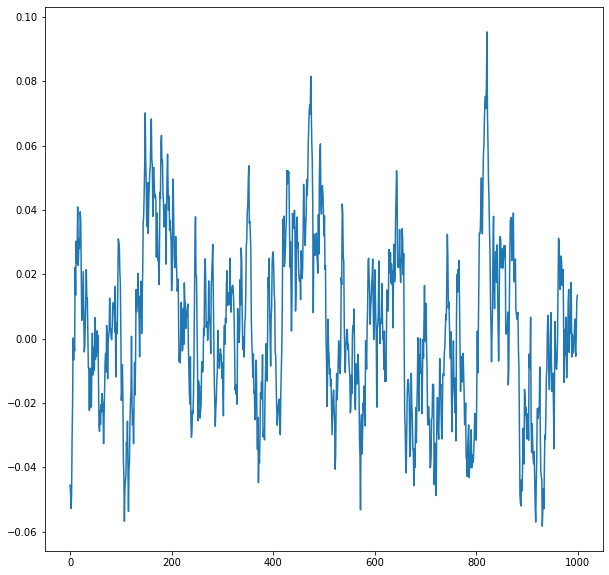

In [5]:
plt.plot(ar1)

### Generate sine curve

In [6]:
season = np.zeros(shape = [n,1])
for i in np.arange(n):
    season[i] = math.sin(i/20)*0.15


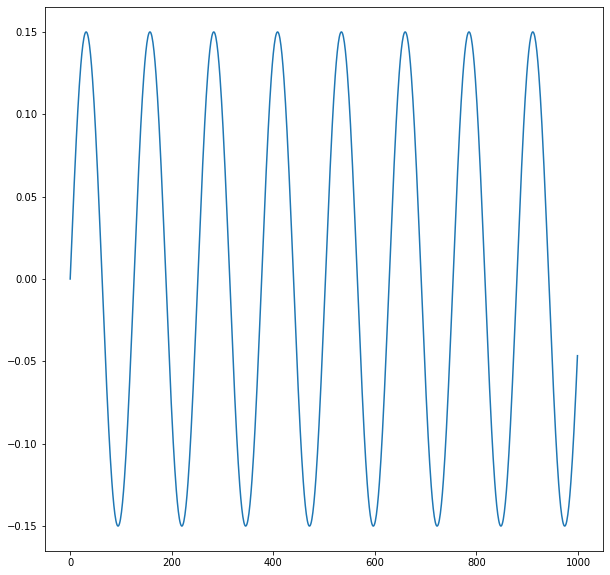

In [7]:
plt.plot(season)

## First scenario: Only look at sine curve

In [8]:
x = season

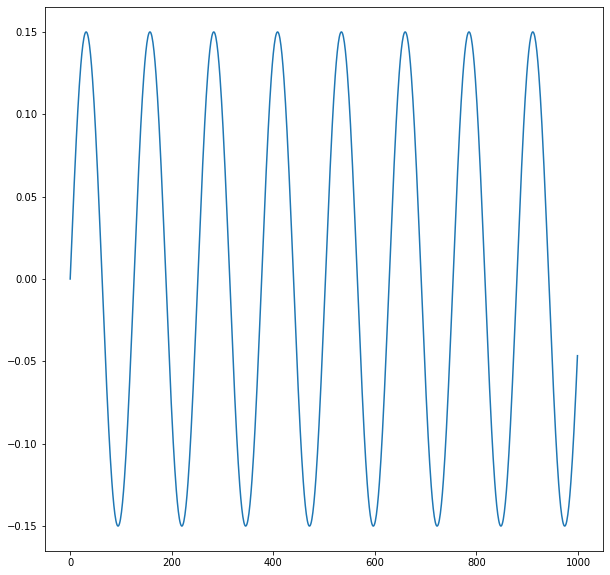

In [9]:
plt.plot(x)

In [10]:
Z = np.empty((r,w))

In [11]:
for i in range(r):
  starttime = t_0 + i * s
  endtime = starttime + w
  Z[i,:] = np.ravel(x[starttime:endtime])


In [12]:
data_sine = pd.DataFrame(data = Z)

In [13]:
data_sine = StandardScaler().fit_transform(data_sine)

In [14]:
reducer = umap.UMAP(random_state=42)


In [15]:
embedding = reducer.fit_transform(data_sine)

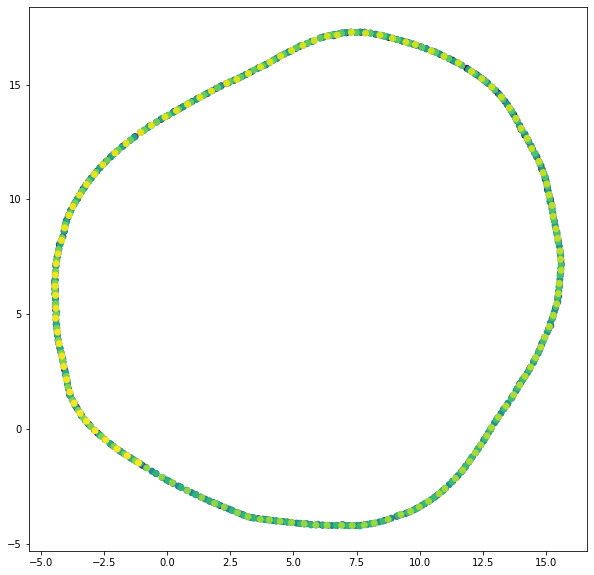

In [16]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = np.arange(embedding.shape[0]))

## Second scenario: Sine curve mixed with AR(1)-process

In [17]:
x = ar1 + season

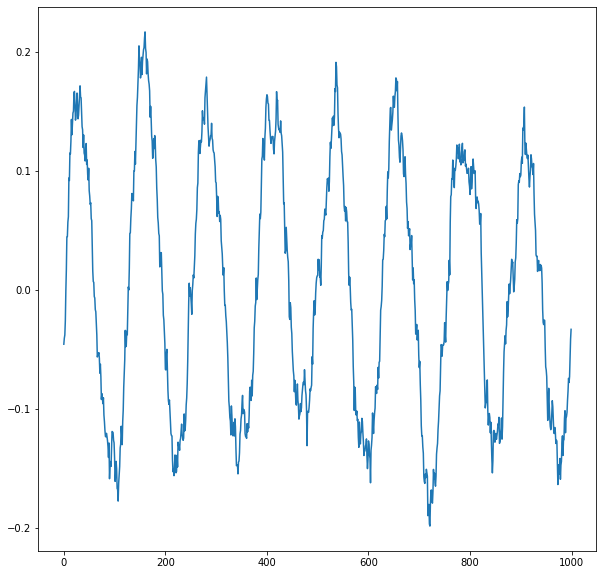

In [18]:
plt.plot(x)


In [19]:
Z = np.empty((r,w))

In [20]:
for i in range(r):
  starttime = t_0 + i * s
  endtime = starttime + w
  Z[i,:] = np.ravel(x[starttime:endtime])


In [21]:
data_mixed = pd.DataFrame(data = Z)

In [22]:
data_mixed = StandardScaler().fit_transform(data_mixed)

In [23]:
reducer = umap.UMAP(random_state=42)


In [24]:
embedding = reducer.fit_transform(data_mixed)

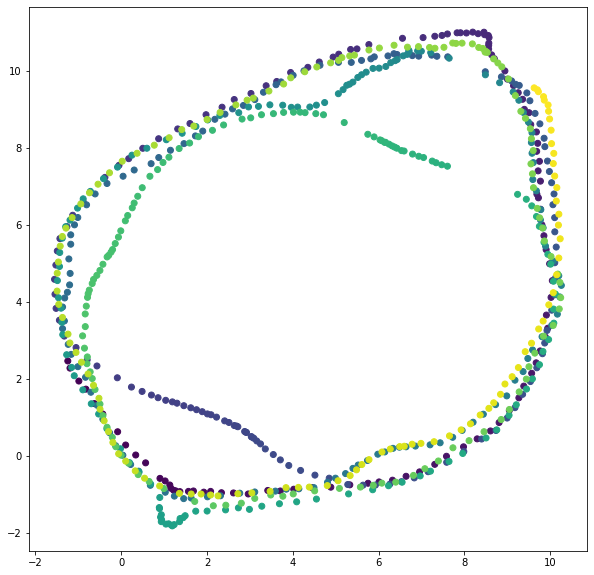

In [25]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = np.arange(embedding.shape[0]))

## Third scenario: Pure AR(1)-process

In [26]:
x = ar1

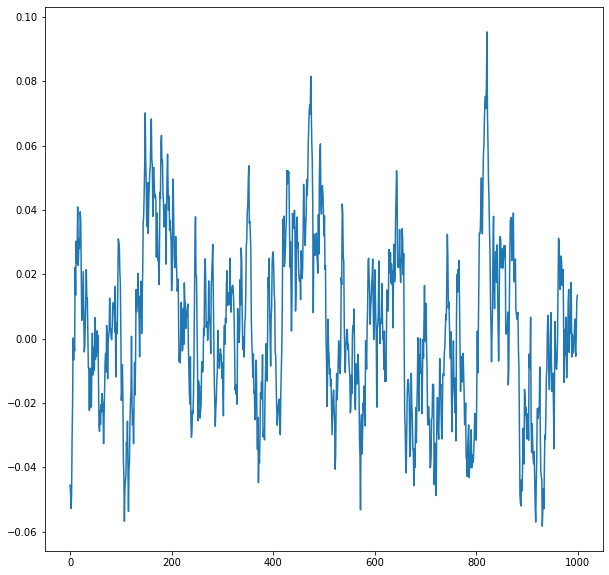

In [27]:
plt.plot(x)

In [28]:
Z = np.empty((r,w))

In [29]:
for i in range(r):
  starttime = t_0 + i * s
  endtime = starttime + w
  Z[i,:] = np.ravel(x[starttime:endtime])


In [30]:
data_ar1 = pd.DataFrame(data = Z)

In [31]:
data_ar1 = StandardScaler().fit_transform(data_ar1)

In [32]:
reducer = umap.UMAP(random_state=42)


In [33]:
embedding = reducer.fit_transform(data_ar1)

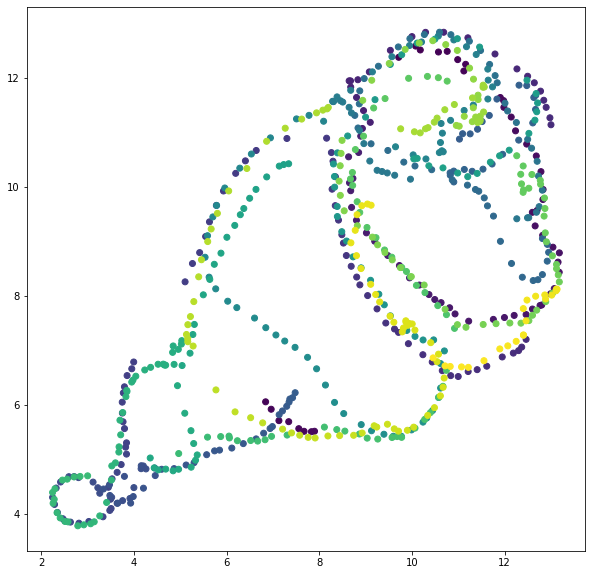

In [34]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = np.arange(embedding.shape[0]))

## Fourth scenario: White Noise

In [35]:
mean = 0
std = 1 
num_samples = 1000
x = np.random.normal(mean, std, size=num_samples)

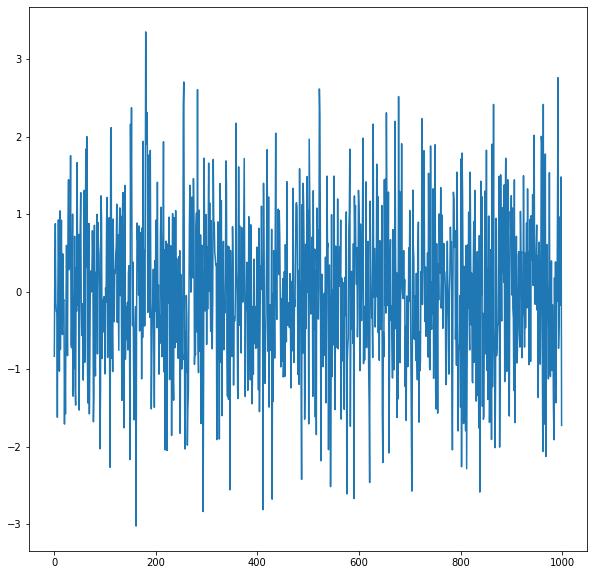

In [36]:
plt.plot(x)

In [37]:
Z = np.empty((r,w))

In [38]:
for i in range(r):
  starttime = t_0 + i * s
  endtime = starttime + w
  Z[i,:] = np.ravel(x[starttime:endtime])



In [39]:
data_white = pd.DataFrame(data = Z)
data_white = StandardScaler().fit_transform(data_white)

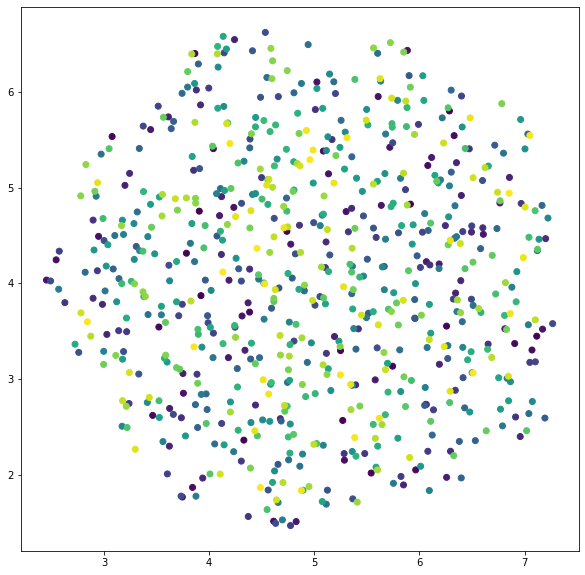

In [40]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(data_white)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = np.arange(embedding.shape[0]))